Modellera MNIST 
Använd maskininlärning för att modellera MNIST datan. Du skall utvärdera minst två olika modeller i 
ditt arbete och göra ett komplett ML-flöde, från början där du laddar in data till slut där du 
utvärderar den bäst valda modellen på din test data. Hur du laddar ned MNIST datan kan du se här.  

In [32]:
# 📌 Python Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Scikit-Learn: Data Handling & Preprocessing
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# 📌 Scikit-Learn: Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# 📌 Scikit-Learn: Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 📌 Scikit-Learn: Save model
import joblib



In [33]:
mnist_data = fetch_openml("mnist_784", version=1, cache = True, as_frame = False)
print(mnist_data.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [34]:
x=mnist_data["data"]
y=mnist_data["target"].astype(np.uint8)## Konvertera etiketter till numeriska värden
print(x.shape)


(70000, 784)


EDA

In [35]:
x.shape

(70000, 784)

In [36]:
print(y.shape)


(70000,)


Preparing data

In [37]:

# Standardize Data (Speeds up convergence)
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(x)



In [38]:
# Steg 2: Dela upp data i tränings- och testset (80% träning, 20% test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,  test_size=0.5, random_state=42) 

# Training set  
print("Training set x: ",X_train.shape) 
print("Training set y: ",y_train.shape) 
print("  ") 
  
# Testing set  
print("Testing set x: ",X_test.shape) 
print("Testing set y: ",y_test.shape) 
print("  ") 
  
# Validation set  
print("Validation set x: ",X_val.shape) 
print("Validation set y: ",y_val.shape) 

Training set x:  (56000, 784)
Training set y:  (56000,)
  
Testing set x:  (7000, 784)
Testing set y:  (7000,)
  
Validation set x:  (7000, 784)
Validation set y:  (7000,)


In [39]:
X_train = X_train / 255.0
X_val = X_val / 255.0  
X_test = X_test / 255.0

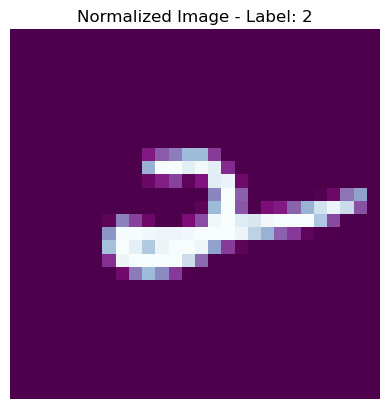

In [40]:
# Assuming X_train is in shape (num_samples, 784), reshape it
x_train = X_train.reshape(-1, 28, 28) / 255.0  # Normalize & Reshape
# Display an image
plt.imshow(x_train[10], cmap='BuPu_r')  # Now it's (28,28)
plt.title(f"Normalized Image - Label: {y_train[10]}")
plt.axis("off")  # Hide axes
plt.show()

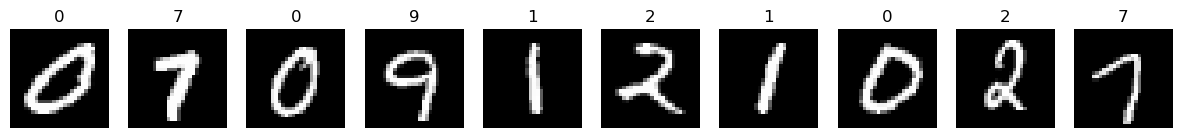

In [41]:

# Select the first 10 images
fig, axes = plt.subplots(1, 10, figsize=(15, 3))

for i in range(10):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title(f"{y_train[i]}")
    axes[i].axis("off")

plt.show()

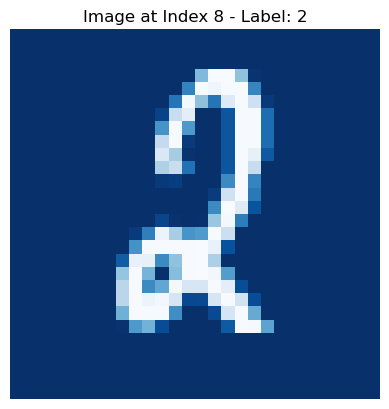

In [42]:


# Choose an index number 
index = 8

# Display the image at the chosen index
plt.imshow(x_train[index], cmap='Blues_r')
plt.title(f"Image at Index {index} - Label: {y_train[index]}")
plt.axis("off")  # Hide axes
plt.show()


Modells

Accuracy is a measure of how many predictions a model gets correct, typically used in classification problems.

In [43]:
# Initiera Decision Trees
decission_trees_clf = DecisionTreeClassifier(random_state=42)

#Intialized Params
Params_dt= {"max_depth": [10, 20, None],
        "min_samples_split": [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
}

#GridsearchCv med cross-validation
grid_search_dt = GridSearchCV(decission_trees_clf, Params_dt, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

#fit on training data
grid_search_dt.fit(X_train, y_train)

# Print the Best Parameters
print("Best Hyperparameters:", grid_search_dt.best_params_)

# Train the Best Model from GridSearch
best_dt_clf = grid_search_dt.best_estimator_

# Predict on Validation Set
y_val_pred_dt = best_dt_clf.predict(X_val)


# Compute Validation Accuracy
val_accuracy_dt = accuracy_score(y_val, y_val_pred_dt)
print(f"Decision Trees Validation Accuracy: {val_accuracy_dt:.4f}")





Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2}
Decision Trees Validation Accuracy: 0.8794


In [ ]:

# Initialize Logistic Regression

logistic_reg = LogisticRegression( random_state=42,  n_jobs=-1)
logistic_reg.fit(X_train, y_train)
 
y_val_pred_lr = logistic_reg.predict(X_val)
val_accuracy_lr = accuracy_score(y_val, y_val_pred_lr)
print(val_accuracy_lr)



0.9255714285714286


In [45]:
# Initiera Random forest classification Modell
random_Forest_clf = RandomForestClassifier(random_state=42, n_jobs=-1)

#Intialized Params
Params_rf= {
        "n_estimators": [50, 100],
        "max_depth": [10, 20],
        "min_samples_split": [2, 5]
    }
#GridsearchCv med cross-validation
grid_search_rf = GridSearchCV(random_Forest_clf, Params_rf, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

#fit on training data
grid_search_rf.fit(X_train, y_train)

# Print the Best Parameters
print("Best Hyperparameters:", grid_search_rf.best_params_)

# Train the Best Model from GridSearch
best_rf_clf = grid_search_rf.best_estimator_

# Predict on Validation Set
y_val_pred_rf = best_rf_clf.predict(X_val)


# Compute Validation Accuracy
val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
print(f"Random Forest Validation Accuracy: {val_accuracy_rf:.4f}")






Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Validation Accuracy: 0.9673


Choosing the Best Model

In [46]:
# Step 2: Compare and choose best Model
if (val_accuracy_rf > val_accuracy_dt) and (val_accuracy_rf > val_accuracy_lr):
    print(f"Random Forest is best model with higest value: {val_accuracy_rf:.4f}") 
elif (val_accuracy_dt > val_accuracy_rf) and (val_accuracy_dt > val_accuracy_lr):
        print(f"Decession tress is best model with higest value: {val_accuracy_rf:.4f}")
else:print(f"Logistik Regression is best model with higest value: {val_accuracy_rf:.4f}")     

Random Forest is best model with higest value: 0.9673


AS Random forest classification has highest validation accuracy. So Random Forest classification is Best Model. So now I perform final testing on unseen data

In [ ]:
# Make predictions for Random forest classification
y_test_pred_rf = best_rf_clf.predict(X_test)



#Compute Accuracy for Random forest classification
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Test Accuracy for Random forest classification: {test_accuracy_rf:.4f}")

Test Accuracy for Random forest classification: 0.9666


Evaluate the Final Model # As i have found the best model. So i evaluate only the Random Forest classification.

In [48]:
## training accuracy is  higher than test accuracy, the model is overfitting.
print(f"Random Forest Validation Accuracy: {val_accuracy_rf:.4f}")
print(f"Test Accuracy for Random forest classification: {test_accuracy_rf:.4f}")


Random Forest Validation Accuracy: 0.9673
Test Accuracy for Random forest classification: 0.9666


In [49]:
# Display Classification Report
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_test_pred_rf))




Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       692
           1       0.99      0.98      0.98       790
           2       0.96      0.97      0.96       725
           3       0.97      0.96      0.96       721
           4       0.96      0.95      0.96       685
           5       0.98      0.97      0.97       642
           6       0.97      0.98      0.97       670
           7       0.97      0.97      0.97       719
           8       0.96      0.96      0.96       676
           9       0.94      0.95      0.94       680

    accuracy                           0.97      7000
   macro avg       0.97      0.97      0.97      7000
weighted avg       0.97      0.97      0.97      7000



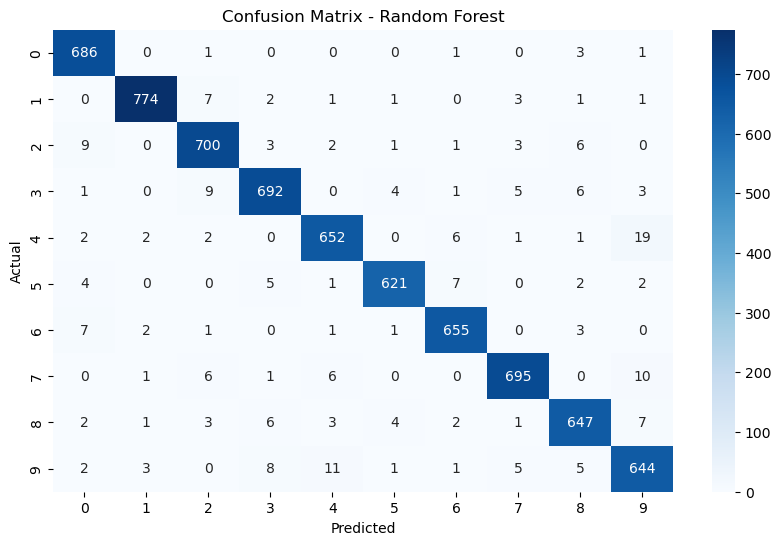

In [50]:
#confusion_matrix: Shows the number of correct/incorrect predictions.
# Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [ ]:
# Save model for streamlit app
joblib.dump(logistic_reg , "Logistik.pkl")


['Logistik.pkl']